In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# Find best match
def find_best_match(patch, strip):
    # TODO: Find patch in strip and return column index (x value) of topleft corner
    deltas = list()
    for i in range(strip.shape[1] - patch.shape[1]):
        deltas.append(np.sum((strip[:, i:i+patch.shape[1]] - patch)**2))
    return np.argmin(np.array(deltas))


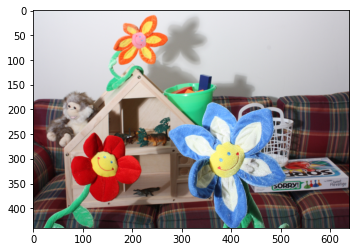

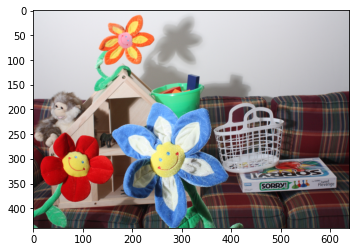

In [9]:
# Test code:

# Load images
left  = cv2.imread('images/flowers-left.png') [:,:,::-1]
right = cv2.imread('images/flowers-right.png')[:,:,::-1]

plt.figure()
plt.imshow(left)

plt.figure()
plt.imshow(right)

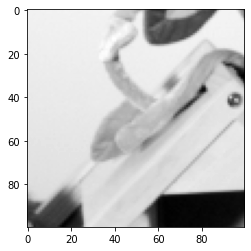

In [10]:
# Convert to grayscale, double, [0, 1] range for easier computation
left_gray = cv2.cvtColor(left, cv2.COLOR_BGR2GRAY) / 255.
right_gray = cv2.cvtColor(right, cv2.COLOR_BGR2GRAY) / 255.

# Define image patch location (topleft [row col]) and size
patch_loc = [94, 119]  # Adapted index values to approximate the difference with the original images shapes
patch_size = [100, 100]

# Extract patch (from left image)
patch_left = left_gray[patch_loc[0]:patch_loc[0] + patch_size[0],
                       patch_loc[1]:patch_loc[1] + patch_size[1]]
plt.imshow(patch_left, cmap='binary_r')

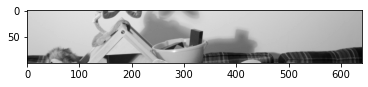

In [11]:

# Extract strip (from right image)
strip_right = right_gray[patch_loc[0]: patch_loc[0] + patch_size[0], :]
plt.imshow(strip_right, cmap='binary_r')

In [12]:
# Now look for the patch in the strip and report the best position (column index of topleft corner)
best_x = find_best_match(patch_left, strip_right)
print(best_x)

patch_right = right_gray[patch_loc[0]: patch_loc[0] + patch_size[0],
                         best_x: best_x + patch_size[1]]


92
